In [1]:
import pandas as pd
import numpy as np

In [15]:
Balance_Sheet=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\ApexFoot\\Data Cleaning\\Balance_Sheet.csv',index_col='BDT Per Billon')
Cash_flow=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\ApexFoot\\Data Cleaning\\Cash_flow.csv',index_col='BDT Per Billon')
Income_Statement=pd.read_csv('C:\\Users\\nafissaad\\Tutorial\\Fundamental analysis\\ApexFoot\\Data Cleaning\\Income_statement.csv',index_col='BDT Per Billon')

In [3]:
Balance_Sheet.columns=[int(i) for i in Balance_Sheet.columns]
Cash_flow.columns=[int(i) for i in Balance_Sheet.columns]
Income_Statement.columns=[int(i) for i in Balance_Sheet.columns]
type(Income_Statement.columns[2])

numpy.int64

In [4]:
Income_Statement.loc['Net Income',Balance_Sheet.columns[4]]+Income_Statement.loc[
    'Interest Expense',Balance_Sheet.columns[4]]+Income_Statement.loc[
    'Income Tax',Balance_Sheet.columns[4]]

985570.0

In [5]:
Income_Statement.loc['EBITDA',Balance_Sheet.columns[4]]

1900000.0

In [6]:
Analysis=pd.DataFrame(columns=[int(i) for i in Balance_Sheet.columns],index=['EPS','ROA','ROE','ROCE',
                                                                 'Total Liabilities / Total Assets',
                                                                'Total Current Assets','Total Non-Current Liabelities','Total Non-Current Assets',
                                                                 'Long-term Debt','ST Debt & Current Portion LT Debt',
                                                                 'Total Current Liabilities','Total Shareholders Equity',
                                                                 'EBIT','Total Capital Employed',
                                                                 'Gross Profit Margin','Asset turnover','Inventories','Liquidity','long-term Debt to Asstes'
                                                                ,'Net Income Growth'])
Analysis

2018 2019 2020 2021 2022
EPS                                NaN  NaN  NaN  NaN  NaN
ROA                                NaN  NaN  NaN  NaN  NaN
ROE                                NaN  NaN  NaN  NaN  NaN
ROCE                               NaN  NaN  NaN  NaN  NaN
Total Liabilities / Total Assets   NaN  NaN  NaN  NaN  NaN
Total Current Assets               NaN  NaN  NaN  NaN  NaN
Total Non-Current Liabelities      NaN  NaN  NaN  NaN  NaN
Total Non-Current Assets           NaN  NaN  NaN  NaN  NaN
Long-term Debt                     NaN  NaN  NaN  NaN  NaN
ST Debt & Current Portion LT Debt  NaN  NaN  NaN  NaN  NaN
Total Current Liabilities          NaN  NaN  NaN  NaN  NaN
Total Shareholders Equity          NaN  NaN  NaN  NaN  NaN
EBIT                               NaN  NaN  NaN  NaN  NaN
Total Capital Employed             NaN  NaN  NaN  NaN  NaN
Gross Profit Margin                NaN  NaN  NaN  NaN  NaN
Asset turnover                     NaN  NaN  NaN  NaN  NaN
Inventories                        NaN  NaN  NaN  NaN  NaN
Liquidity                          NaN  NaN  NaN  NaN  NaN
long-term Debt to Asstes           NaN  NaN  NaN  NaN  NaN
Net Income Growth                  NaN  NaN  NaN  NaN  NaN

In [7]:
def EPS(Balance_Sheet,Cash_flow,Income_Statement):
    return(Income_Statement.loc['EPS (Basic)',i])

def ROA(Balance_Sheet,Cash_flow,Income_Statement):
    return(Income_Statement.loc['Net Income',i]/Balance_Sheet.loc['Total Assets',i])

def ROE(Balance_Sheet,Cash_flow,Income_Statement):
    return(Income_Statement.loc['Net Income',i]/Balance_Sheet.loc["Total Shareholders' Equity",i])

def EBIT(Balance_Sheet,Cash_flow,Income_Statement):
    return(Income_Statement.loc['Net Income',i]+Income_Statement.loc[
    'Interest Expense',i]+Income_Statement.loc[
    'Income Tax',i])

def ROCE(Balance_Sheet,Cash_flow,Income_Statement):
    return((Income_Statement.loc['Net Income',i]+Income_Statement.loc[
    'Interest Expense',i]+Income_Statement.loc[
    'Income Tax',i])/(Balance_Sheet.loc["Total Assets",i]-Balance_Sheet.loc["Total Current Liabilities",i]))


In [8]:
for i in Analysis.columns:
    Analysis.loc['EPS',i]=EPS(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['ROA',i]=ROA(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['ROE',i]=ROE(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['EBIT',i]=EBIT(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['ROCE',i]=ROCE(Balance_Sheet,Cash_flow,Income_Statement)
    Analysis.loc['Total Non-Current Liabelities',i]=Balance_Sheet.loc['Total Liabilities',i]-Balance_Sheet.loc['Total Current Liabilities',i]
    Analysis.loc['Total Liabilities / Total Assets',i]=Balance_Sheet.loc['Total Liabilities / Total Assets',i]
    Analysis.loc['Total Current Liabilities',i]=Balance_Sheet.loc['Total Current Liabilities',i]
    Analysis.loc['Total Non-Current Assets',i]=Balance_Sheet.loc['Total Assets',i]-Balance_Sheet.loc["Total Current Assets",i]
    Analysis.loc['Long-term Debt',i]=Balance_Sheet.loc['Long-Term Debt',i]
    Analysis.loc['Total Current Assets',i]=Balance_Sheet.loc['Total Current Assets',i]
    Analysis.loc['Net Income Growth',i]=Income_Statement.loc['Net Income Growth',i]
    Analysis.loc['Inventories',i]=Balance_Sheet.loc['Inventories',i]
    Analysis.loc['Total Capital Employed',i]=Balance_Sheet.loc["Total Assets",i]-Balance_Sheet.loc["Total Current Liabilities",i]
    Analysis.loc['Total Shareholders Equity',i]=Balance_Sheet.loc["Total Shareholders' Equity",i]
    Analysis.loc['ST Debt & Current Portion LT Debt',i]=Balance_Sheet.loc["ST Debt & Current Portion LT Debt",i]
    Analysis.loc['Liquidity',i]=Balance_Sheet.loc["Total Current Assets",i]/Balance_Sheet.loc["Total Current Liabilities",i]
    Analysis.loc['Gross Profit Margin',i]=(Income_Statement.loc['Sales/Revenue',i]-Income_Statement.loc['Cost of Goods Sold (COGS) incl. D&A',i])/Income_Statement.loc['Sales/Revenue',i]
    if i==Analysis.columns[0]:
        Analysis.loc['Asset turnover',i]=Income_Statement.loc["Sales/Revenue",i]/((Balance_Sheet.loc['Total Assets',i]+Balance_Sheet.loc['Total Assets',i])/2)
    else:
        Analysis.loc['Asset turnover',i]=Income_Statement.loc["Sales/Revenue",i]/((Balance_Sheet.loc['Total Assets',i]+Balance_Sheet.loc['Total Assets',i-1])/2)

    Analysis.loc['long-term Debt to Asstes',i]=Analysis.loc["Total Non-Current Assets",i]/Analysis.loc["Total Non-Current Liabelities",i]

    

In [9]:
Analysis

2018        2019        2020  \
EPS                                      9.99        9.45        4.87   
ROA                                  0.009047    0.008098    0.003591   
ROE                                  0.047211     0.04369    0.022502   
ROCE                                 0.205224    0.202258    0.167542   
Total Liabilities / Total Assets       0.8084      0.8146      0.8403   
Total Current Assets               10260000.0  10710000.0  10560000.0   
Total Non-Current Liabelities       1400000.0   1650000.0   3690000.0   
Total Non-Current Assets            4090000.0   4450000.0   7050000.0   
Long-term Debt                      1070000.0   1320000.0   3320000.0   
ST Debt & Current Portion LT Debt   8880000.0   9490000.0  10040000.0   
Total Current Liabilities          10200000.0  10700000.0  11110000.0   
Total Shareholders Equity           2750000.0   2810000.0   2810000.0   
EBIT                                 851680.0    902070.0   1089020.0   
Total Capital Employed              4150000.0   4460000.0   6500000.0   
Gross Profit Margin                   0.19373    0.205566    0.215072   
Asset turnover                       1.111498    1.071501    0.720781   
Inventories                         7440000.0   7380000.0   8750000.0   
Liquidity                            1.005882    1.000935    0.950495   
long-term Debt to Asstes             2.921429     2.69697    1.910569   
Net Income Growth                         NaN     -0.0544     -0.4849   

                                         2021        2022  
EPS                                      8.11       10.64  
ROA                                   0.00598    0.006776  
ROE                                  0.036439    0.046231  
ROCE                                 0.126972    0.091938  
Total Liabilities / Total Assets       0.8359      0.8535  
Total Current Assets               10310000.0  12170000.0  
Total Non-Current Liabelities       5630000.0   7730000.0  
Total Non-Current Assets            7300000.0   8230000.0  
Long-term Debt                      5320000.0   7410000.0  
ST Debt & Current Portion LT Debt   8150000.0   8560000.0  
Total Current Liabilities           9090000.0   9680000.0  
Total Shareholders Equity           2890000.0   2990000.0  
EBIT                                1081800.0    985570.0  
Total Capital Employed              8520000.0  10720000.0  
Gross Profit Margin                  0.215986    0.215112  
Asset turnover                       0.667802    0.682452  
Inventories                         8300000.0   9890000.0  
Liquidity                            1.134213    1.257231  
long-term Debt to Asstes             1.296625    1.064683  
Net Income Growth                      0.6655      0.3125

In [10]:
Analysis.columns=[str(i) for i in Analysis.columns]
Analysis.columns=pd.to_datetime(Analysis.columns)#+pd.offsets.YearEnd()#pd.offsets.MonthEnd
Analysis

2018-01-01  2019-01-01  2020-01-01  \
EPS                                      9.99        9.45        4.87   
ROA                                  0.009047    0.008098    0.003591   
ROE                                  0.047211     0.04369    0.022502   
ROCE                                 0.205224    0.202258    0.167542   
Total Liabilities / Total Assets       0.8084      0.8146      0.8403   
Total Current Assets               10260000.0  10710000.0  10560000.0   
Total Non-Current Liabelities       1400000.0   1650000.0   3690000.0   
Total Non-Current Assets            4090000.0   4450000.0   7050000.0   
Long-term Debt                      1070000.0   1320000.0   3320000.0   
ST Debt & Current Portion LT Debt   8880000.0   9490000.0  10040000.0   
Total Current Liabilities          10200000.0  10700000.0  11110000.0   
Total Shareholders Equity           2750000.0   2810000.0   2810000.0   
EBIT                                 851680.0    902070.0   1089020.0   
Total Capital Employed              4150000.0   4460000.0   6500000.0   
Gross Profit Margin                   0.19373    0.205566    0.215072   
Asset turnover                       1.111498    1.071501    0.720781   
Inventories                         7440000.0   7380000.0   8750000.0   
Liquidity                            1.005882    1.000935    0.950495   
long-term Debt to Asstes             2.921429     2.69697    1.910569   
Net Income Growth                         NaN     -0.0544     -0.4849   

                                   2021-01-01  2022-01-01  
EPS                                      8.11       10.64  
ROA                                   0.00598    0.006776  
ROE                                  0.036439    0.046231  
ROCE                                 0.126972    0.091938  
Total Liabilities / Total Assets       0.8359      0.8535  
Total Current Assets               10310000.0  12170000.0  
Total Non-Current Liabelities       5630000.0   7730000.0  
Total Non-Current Assets            7300000.0   8230000.0  
Long-term Debt                      5320000.0   7410000.0  
ST Debt & Current Portion LT Debt   8150000.0   8560000.0  
Total Current Liabilities           9090000.0   9680000.0  
Total Shareholders Equity           2890000.0   2990000.0  
EBIT                                1081800.0    985570.0  
Total Capital Employed              8520000.0  10720000.0  
Gross Profit Margin                  0.215986    0.215112  
Asset turnover                       0.667802    0.682452  
Inventories                         8300000.0   9890000.0  
Liquidity                            1.134213    1.257231  
long-term Debt to Asstes             1.296625    1.064683  
Net Income Growth                      0.6655      0.3125

In [11]:
pd.read_html('https://www.dsebd.org/displayCompany.php?name=APEXFOOT')[323]

0        1                           2  \
0         Last Trading Price   382.70               Closing Price   
1                Last Update  2:10 PM                 Day's Range   
2                    Change*     29.5            Day's Value (mn)   
3                    Change*    8.35%      52 Weeks' Moving Range   
4              Opening Price   355.00         Day's Volume (Nos.)   
5     Adjusted Opening Price   353.20          Day's Trade (Nos.)   
6  Yesterday's Closing Price   353.20  Market Capitalization (mn)   

                 3  
0           382.70  
1  352.50 - 384.10  
2           305.58  
3  254.50 - 386.20  
4        815473.00  
5             4341  
6         4589.393

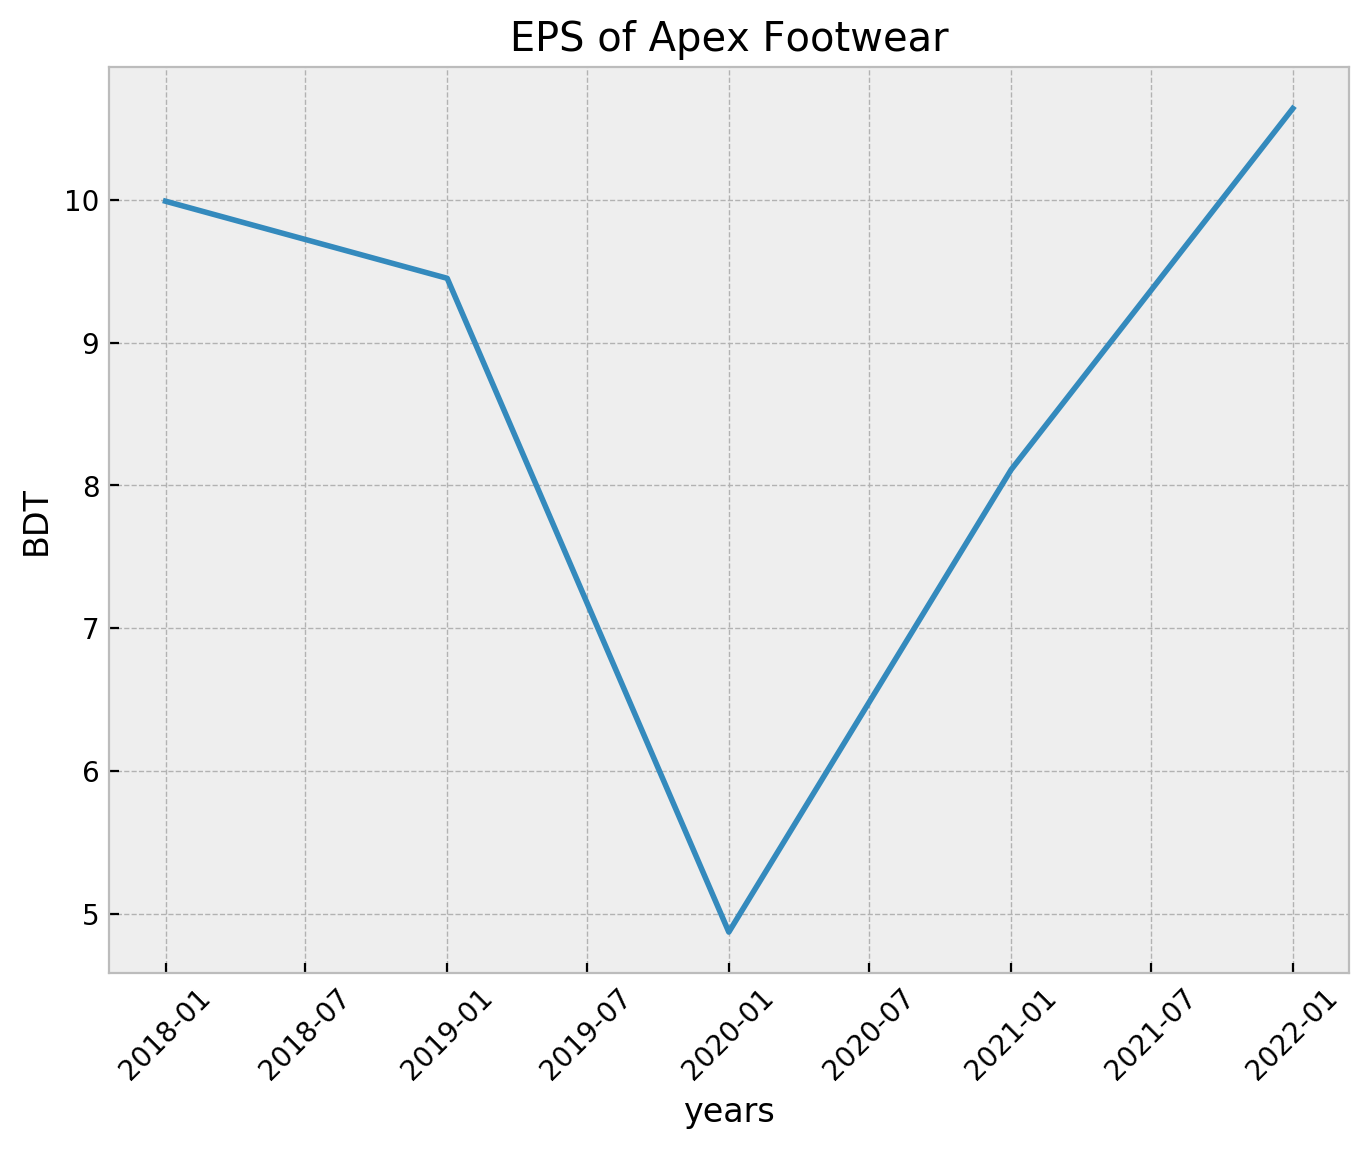

In [12]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(8, 6), dpi=200)
plt.title('EPS of Apex Footwear')
plt.plot(np.array(Analysis.columns),np.array(Analysis.loc['EPS'].values))
plt.xlabel('years')
plt.ylabel('BDT')
plt.xticks(rotation=45)
plt.show()

In [16]:
plt.figure(figsize=(60,50), dpi=200)
plt.style.use('seaborn')
for i in range(1,20):
    plt.subplot(5, 5, i)
    plt.plot(np.array(Balance_Sheet.columns),np.array(Analysis.loc[Analysis.index[i]].values),linewidth=12)
    plt.scatter(np.array(Balance_Sheet.columns),np.array(Analysis.loc[Analysis.index[i]].values),color='r',linewidth=15)
    plt.title(Analysis.index[i],fontsize=35,)
    plt.xticks(fontsize=35)
    plt.yticks(rotation=35,fontsize=30)

In [14]:
from matplotlib import style
  
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
